<h1 align="center">Stock Price Prediction Using RNN & LSTM</h1>

#

- I have taken the Bharti Airtel Stock data from NSE India website.
>
- Link : https://www.nseindia.com/get-quotes/equity?symbol=BHARTIARTL
>

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
airtel_df = pd.read_csv("Bharti_Airtel_Prices.csv", parse_dates=True)
airtel_df = airtel_df[::-1].reset_index(drop=True)
airtel_df

,Date,series,OPEN,HIGH,LOW,PREV_CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades
0,01-Mar-2021,EQ,558.00,559.10,521.00,556.30,532.80,532.20,532.76,623.00,361.75,54075848,2.880931e+10,558647
1,02-Mar-2021,EQ,540.50,544.00,528.85,532.20,541.95,541.20,536.23,623.00,361.75,30058411,1.611809e+10,338203
2,03-Mar-2021,EQ,548.75,550.75,540.00,541.20,546.85,546.30,546.32,623.00,361.75,24214390,1.322878e+10,314197
3,04-Mar-2021,EQ,540.00,546.00,538.00,546.30,539.95,539.60,540.38,623.00,361.75,17352483,9.376888e+09,188724
4,05-Mar-2021,EQ,535.00,538.50,524.40,539.60,533.80,532.80,532.15,623.00,361.75,16351700,8.701569e+09,182600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,22-Feb-2023,EQ,777.00,781.65,766.50,779.05,767.50,772.15,775.07,860.55,628.75,3261898,2.528188e+09,90485
493,23-Feb-2023,EQ,774.00,777.50,761.85,772.15,765.00,762.95,767.56,860.55,628.75,4062194,3.117959e+09,97508
494,24-Feb-2023,EQ,775.70,775.80,755.00,762.95,757.00,757.10,762.75,860.55,628.75,4357223,3.323491e+09,97761
495,27-Feb-2023,EQ,753.00,754.40,738.45,757.10,753.50,752.90,747.25,860.55,628.75,6719439,5.021133e+09,115748


In [3]:
airtel_df.drop(["series"], axis=1, inplace=True)
airtel_df.set_index("Date",inplace=True)
airtel_df

,OPEN,HIGH,LOW,PREV_CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades
Date,,,,,,,,,,,,
01-Mar-2021,558.00,559.10,521.00,556.30,532.80,532.20,532.76,623.00,361.75,54075848,2.880931e+10,558647
02-Mar-2021,540.50,544.00,528.85,532.20,541.95,541.20,536.23,623.00,361.75,30058411,1.611809e+10,338203
03-Mar-2021,548.75,550.75,540.00,541.20,546.85,546.30,546.32,623.00,361.75,24214390,1.322878e+10,314197
04-Mar-2021,540.00,546.00,538.00,546.30,539.95,539.60,540.38,623.00,361.75,17352483,9.376888e+09,188724
05-Mar-2021,535.00,538.50,524.40,539.60,533.80,532.80,532.15,623.00,361.75,16351700,8.701569e+09,182600
...,...,...,...,...,...,...,...,...,...,...,...,...
22-Feb-2023,777.00,781.65,766.50,779.05,767.50,772.15,775.07,860.55,628.75,3261898,2.528188e+09,90485
23-Feb-2023,774.00,777.50,761.85,772.15,765.00,762.95,767.56,860.55,628.75,4062194,3.117959e+09,97508
24-Feb-2023,775.70,775.80,755.00,762.95,757.00,757.10,762.75,860.55,628.75,4357223,3.323491e+09,97761


## Basic EDA Operations

In [4]:
airtel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 01-Mar-2021 to 28-Feb-2023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OPEN          497 non-null    float64
 1   HIGH          497 non-null    float64
 2   LOW           497 non-null    float64
 3   PREV_CLOSE    497 non-null    float64
 4   ltp           497 non-null    float64
 5   close         497 non-null    float64
 6   vwap          497 non-null    float64
 7   52W_H         497 non-null    float64
 8   52W_L         497 non-null    float64
 9   VOLUME        497 non-null    int64  
 10  VALUE         497 non-null    float64
 11  No_of_trades  497 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 50.5+ KB


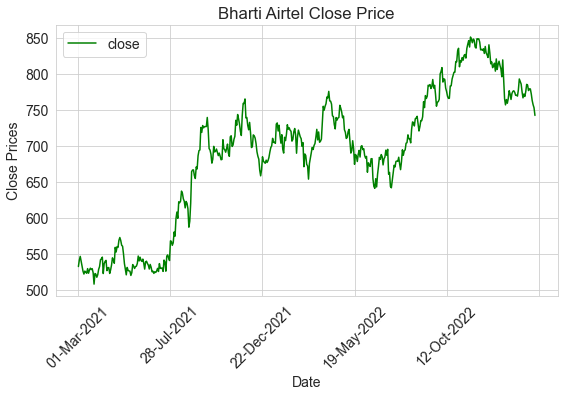

In [5]:
airtel_df["close"].plot(color="g",rot=45, ylabel="Close Prices",legend="Airtel Close Price")
plt.title("Bharti Airtel Close Price")
plt.show()

In [6]:
airtel_df["close"].describe()

count    497.000000
mean     688.089437
std       93.888791
min      507.750000
25%      641.650000
50%      700.400000
75%      758.500000
max      851.200000
Name: close, dtype: float64

<AxesSubplot:xlabel='Date'>

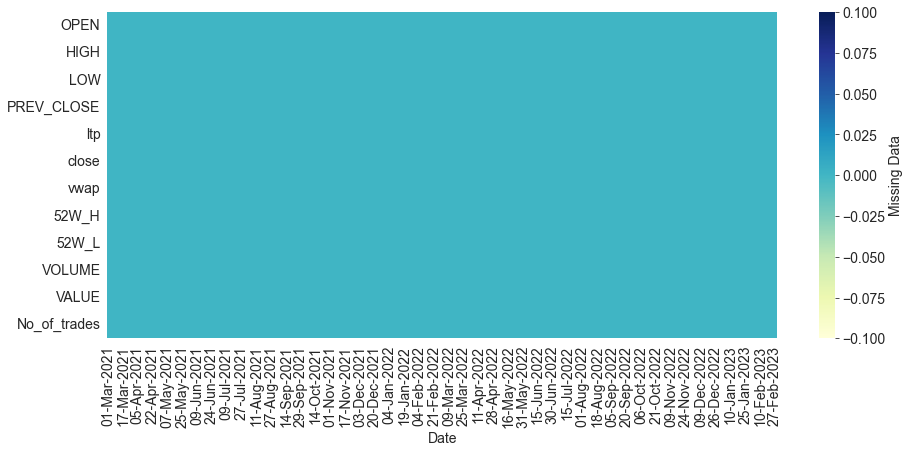

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(airtel_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

## Data Preparation

In [8]:
airtel_close = airtel_df["close"]

In [9]:
airtel_close.reset_index(drop=True, inplace=True)
airtel_close = pd.DataFrame(airtel_close)
airtel_close

,close
0,532.20
1,541.20
2,546.30
3,539.60
4,532.80
...,...
492,772.15
493,762.95
494,757.10
495,752.90


In [10]:
train = airtel_close.iloc[:481]
test = airtel_close.iloc[481:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [12]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Building RNN Model

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
test.shape

(16, 1)

In [15]:
length = 16
batch_size = 32

# It will create an object with train-length & last 16 values will be predicted
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [17]:
n_features = 1

In [18]:
model = Sequential()

model.add(SimpleRNN(30, input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(generator, epochs=10, shuffle=False)

Epoch 1/10
15/15 [==============================] - 1s 4ms/step - loss: 0.0446
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 9/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 10/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0106


<AxesSubplot:>

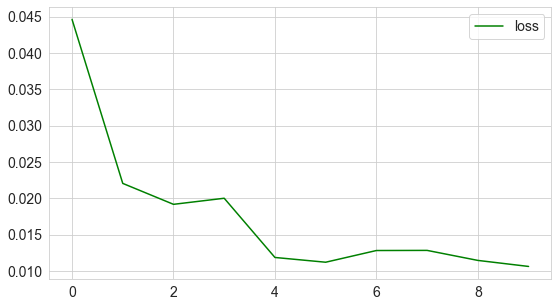

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot(color=["g"])

In [22]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.74697918],
       [0.73198428],
       [0.75105547],
       [0.78264667],
       [0.76939875],
       [0.74741593],
       [0.77143689],
       [0.7800262 ],
       [0.78250109],
       [0.77667783],
       [0.76415781],
       [0.76444897],
       [0.76095502],
       [0.78614063],
       [0.83025186],
       [0.8196244 ]])

In [23]:
import tensorflow as tf
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  # get prediction 1 time stamp ahead
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(tf.get_static_value(current_pred))

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 [==============================] - 0s 24ms/step


In [24]:
test_predictions

[array([0.78580666], dtype=float32),
 array([0.7615385], dtype=float32),
 array([0.7744926], dtype=float32),
 array([0.7817365], dtype=float32),
 array([0.76306504], dtype=float32),
 array([0.74674904], dtype=float32),
 array([0.7453432], dtype=float32),
 array([0.7496888], dtype=float32),
 array([0.7368879], dtype=float32),
 array([0.7257269], dtype=float32),
 array([0.7335491], dtype=float32),
 array([0.7288784], dtype=float32),
 array([0.70396256], dtype=float32),
 array([0.6925528], dtype=float32),
 array([0.70254976], dtype=float32),
 array([0.7111906], dtype=float32)]

In [25]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[777.63529596],
       [769.30039973],
       [773.74949083],
       [776.23739856],
       [769.82468803],
       [764.22095898],
       [763.7381249 ],
       [765.23061979],
       [760.83413971],
       [757.00090466],
       [759.68744459],
       [758.08327922],
       [749.52594277],
       [745.60726086],
       [749.04071355],
       [752.00840515]])

In [26]:
test["RNN_Pred"] = true_predictions
test

,close,RNN_Pred
481,785.90,777.635296
482,775.10,769.300400
483,766.65,773.749491
484,771.95,776.237399
485,768.60,769.824688
486,775.20,764.220959
487,785.40,763.738125
488,784.45,765.230620
489,776.80,760.834140
490,779.15,757.000905


In [27]:
def wmape(actual, forecast):
    # make a series called mape
    se_mape = abs(actual-forecast)/actual
    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

result_wmape = wmape(test["close"],test["RNN_Pred"])
accuracy = (1-result_wmape)*100
print(f"Weighted Mean Absolute Percentage Error (WMAPE) : {round(result_wmape,4)*100}%")
print()
print(f"Overall Accuracy : {round(accuracy,2)}%")

Weighted Mean Absolute Percentage Error (WMAPE) : 1.53%

Overall Accuracy : 98.47%


<AxesSubplot:>

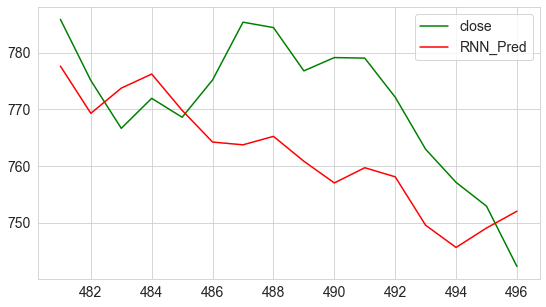

In [28]:
test.plot(color=["g","r"])

<AxesSubplot:>

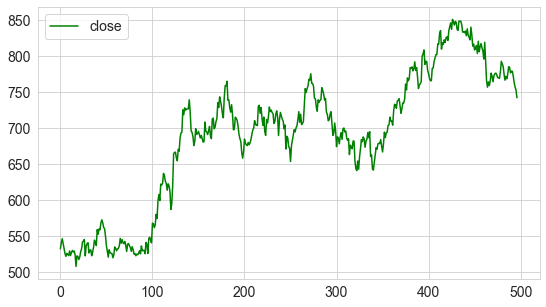

In [29]:
airtel_close.plot(color="g")

## Let's Create RNN model - Using Complete Data

In [30]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [31]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length=length, batch_size=32)


In [32]:
model = Sequential()

model.add(SimpleRNN(30, input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(generator, epochs=10, shuffle=False)

Epoch 1/10
16/16 [==============================] - 1s 4ms/step - loss: 0.1780
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2153
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0150


<AxesSubplot:>

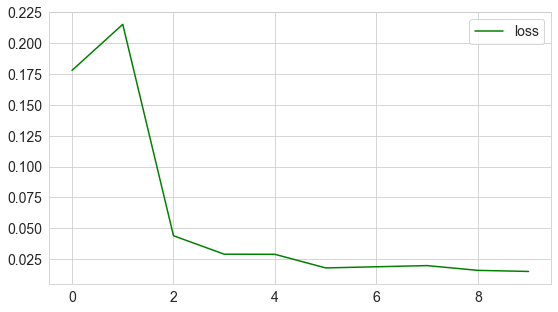

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot(color=["g"])

In [36]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  # get prediction 1 time stamp ahead
  current_pred = model.predict(current_batch)[0]

  forecast.append(tf.get_static_value(current_pred))

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 [==============================] - 0s 21ms/step


In [37]:
forecast = full_scaler.inverse_transform(forecast)
forecast # Next 20 days predictions from 1st march

array([[770.61772243],
       [768.5453599 ],
       [768.25829205],
       [771.05275623],
       [768.79459695],
       [767.06432889],
       [766.57539439],
       [763.13019122],
       [757.69119404],
       [756.89162931],
       [757.24316102],
       [756.02350649],
       [753.62151645],
       [752.97393002],
       [753.09466925],
       [751.60428289],
       [749.1924462 ],
       [748.67391032],
       [748.8547735 ],
       [748.44285171]])

In [38]:
forecast.flatten()

array([770.61772243, 768.5453599 , 768.25829205, 771.05275623,
       768.79459695, 767.06432889, 766.57539439, 763.13019122,
       757.69119404, 756.89162931, 757.24316102, 756.02350649,
       753.62151645, 752.97393002, 753.09466925, 751.60428289,
       749.1924462 , 748.67391032, 748.8547735 , 748.44285171])

- This is our next 20 days Stock Price Predictions Using RNN model.
>

In [39]:
df_array = np.array(airtel_close)
df_array

array([[532.2 ],
       [541.2 ],
       [546.3 ],
       [539.6 ],
       [532.8 ],
       [525.7 ],
       [521.75],
       [525.85],
       [524.2 ],
       [522.85],
       [529.3 ],
       [522.9 ],
       [527.2 ],
       [529.95],
       [528.  ],
       [529.25],
       [523.65],
       [507.75],
       [522.5 ],
       [521.5 ],
       [517.3 ],
       [520.8 ],
       [528.25],
       [532.2 ],
       [541.6 ],
       [543.  ],
       [545.25],
       [522.45],
       [536.15],
       [539.35],
       [540.75],
       [526.45],
       [530.2 ],
       [530.85],
       [522.6 ],
       [527.55],
       [534.3 ],
       [544.3 ],
       [540.85],
       [536.75],
       [558.85],
       [552.45],
       [559.95],
       [558.75],
       [568.5 ],
       [572.55],
       [568.4 ],
       [561.75],
       [560.4 ],
       [549.65],
       [536.35],
       [528.2 ],
       [520.65],
       [530.95],
       [526.8 ],
       [526.1 ],
       [525.75],
       [519.8 ],
       [523.6 

<AxesSubplot:>

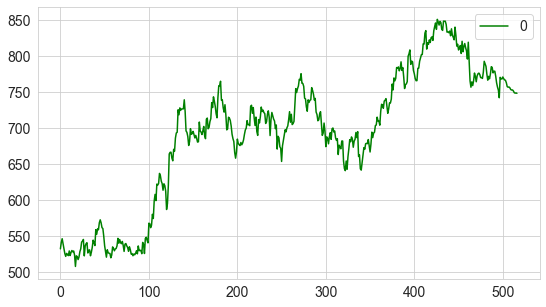

In [40]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))
full_data.plot(color="g")

#

# LSTM Model

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [53]:
scaled_test.shape

(16, 1)

In [54]:
length = 15
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                length=length, batch_size=32)

In [55]:
model = Sequential()

model.add(LSTM(30, input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30)                3840      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(generator, epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop], shuffle=False)


Epoch 1/20
15/15 [==============================] - 2s 36ms/step - loss: 0.0432 - val_loss: 0.0196
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 5.2327e-04
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0142 - val_loss: 0.0020
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0117 - val_loss: 0.0032


<AxesSubplot:>

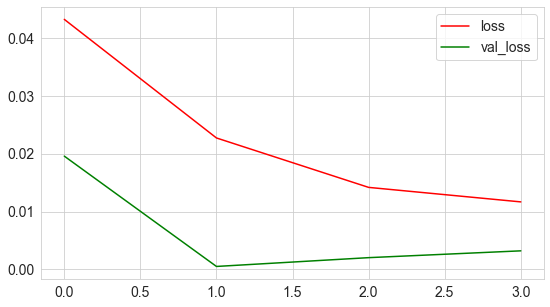

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot(color=["r","g"])

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  # get prediction 1 time stamp ahead
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(tf.get_static_value(current_pred))

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 [==============================] - 0s 22ms/step


In [60]:
test_predictions

[array([0.7597603], dtype=float32),
 array([0.75701874], dtype=float32),
 array([0.7546142], dtype=float32),
 array([0.7516835], dtype=float32),
 array([0.74880725], dtype=float32),
 array([0.74611676], dtype=float32),
 array([0.743104], dtype=float32),
 array([0.7399791], dtype=float32),
 array([0.7368336], dtype=float32),
 array([0.73377234], dtype=float32),
 array([0.73087054], dtype=float32),
 array([0.7279773], dtype=float32),
 array([0.72513735], dtype=float32),
 array([0.7220267], dtype=float32),
 array([0.71845627], dtype=float32),
 array([0.71508735], dtype=float32)]

<AxesSubplot:>

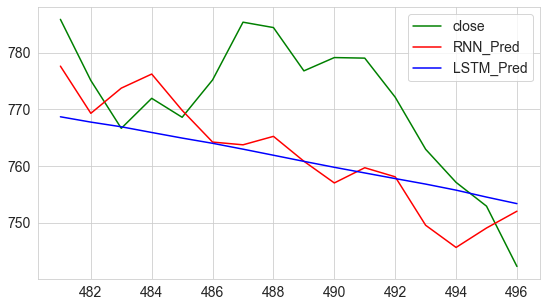

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)
test["LSTM_Pred"] = true_predictions
test.plot(color=["g","r","b"])

In [62]:
def wmape(actual, forecast):
    # make a series called mape
    se_mape = abs(actual-forecast)/actual
    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

result_wmape = wmape(test["close"],test["LSTM_Pred"])
accuracy = (1-result_wmape)*100
print(f"Weighted Mean Absolute Percentage Error (WMAPE) : {round(result_wmape,4)*100}%")
print()
print(f"Overall Accuracy : {round(accuracy,2)}%")

Weighted Mean Absolute Percentage Error (WMAPE) : 1.47%

Overall Accuracy : 98.53%


- Here, Using LSTM model we got ~98% accuracy.

## Observations:
- Here, we can observed that the RNN model is closely following the uptrend and downtrend as of actual stock prices, as compare to LSTM model, still both have same accuracy of prediction.
>
- Hence, for this dataset we will be using RNN model to predict stock prices.